In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


# CIFAR-10 Photo Classification Dataset

CIFAR is an acronym that stands for the Canadian Institute For Advanced Research and the CIFAR-10 dataset was developed along with the CIFAR-100 dataset by researchers at the CIFAR institute.


The dataset is comprised of 60,000 32×32 pixel color photographs of objects from 10 classes, such as frogs, birds, cats, ships, etc. The class labels and their standard associated integer values are listed below.


* 0: airplane

* 1: automobile

* 2: bird

* 3: cat

* 4: deer

* 5: dog

* 6: frog

* 7: horse

* 8: ship

* 9: truck


These are very small images, much smaller than a typical photograph, and the dataset was intended for computer vision research.

In [4]:
x_train[0].shape

(32, 32, 3)

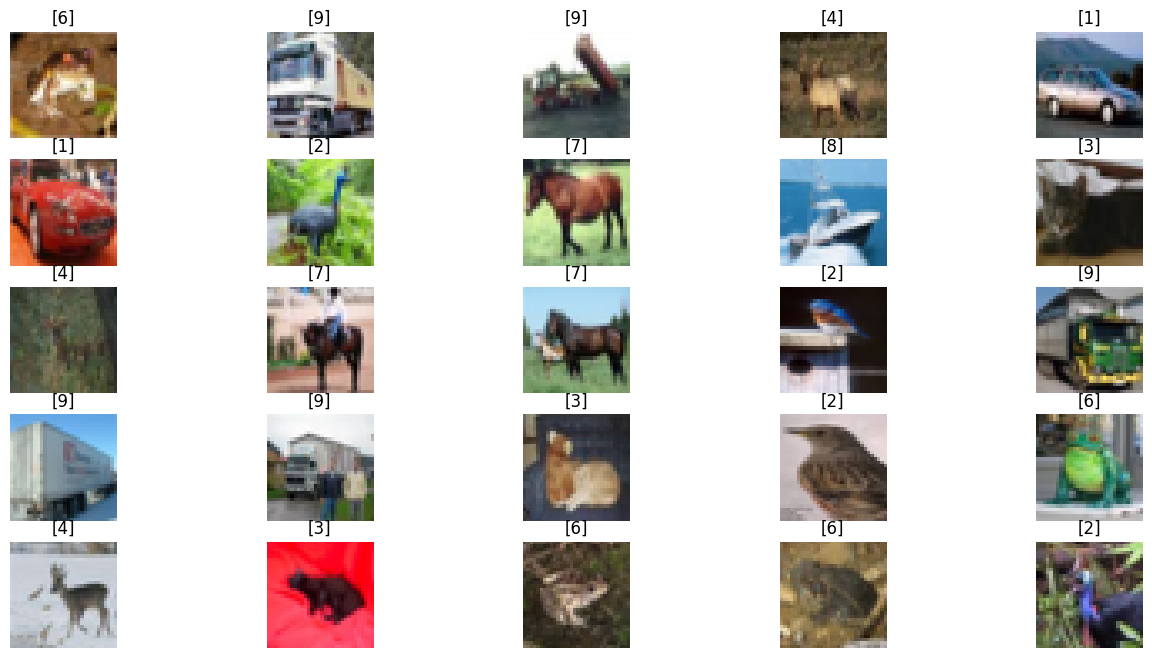

In [5]:
# create figure
fig = plt.figure(figsize=(16, 8))

# setting values to rows and column variables
rows = 5
columns = 5

for i in range(25):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
    plt.title(f'{y_train[i]}')

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
x_train[0].max()

255

In [8]:
x_train = x_train/255

In [9]:
x_test = x_test/255

In [10]:
x_test.shape

(10000, 32, 32, 3)

In [11]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [15]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape = (32,32,3), activation='relu'))


model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))


model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

# Output layer

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 32)        25632     
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 3, 32)          0         
 g2D)                                                   

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [20]:
model.fit(x_train, y_cat_train,epochs=15,
         validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6235 - accuracy: 0.7773 - val_loss: 0.8777 - val_accuracy: 0.7085
Epoch 2/15
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5815 - accuracy: 0.7949 - val_loss: 0.8582 - val_accuracy: 0.7193
Epoch 3/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5531 - accuracy: 0.8017 - val_loss: 0.8651 - val_accuracy: 0.7141
Epoch 4/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5208 - accuracy: 0.8134 - val_loss: 0.9014 - val_accuracy: 0.7182


In [21]:
metrics = pd.DataFrame(model.history.history)

<Axes: >

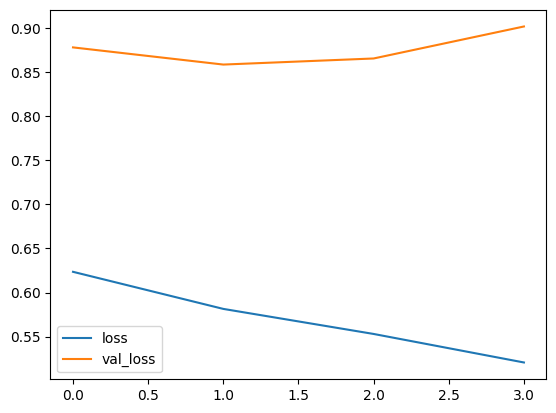

In [22]:
metrics[['loss', 'val_loss']].plot()

<Axes: >

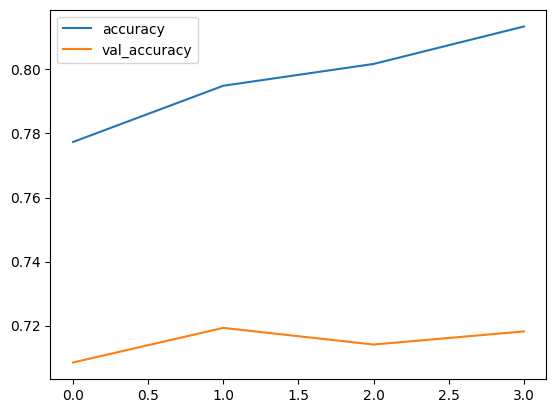

In [23]:
metrics[['accuracy', 'val_accuracy']].plot()

In [24]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9014 - accuracy: 0.7182


[0.9013887643814087, 0.7182000279426575]

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
prediction = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [27]:
predictions = [np.argmax(x, axis=0) for x in prediction]

In [28]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      1000
           1       0.83      0.85      0.84      1000
           2       0.61      0.65      0.63      1000
           3       0.48      0.60      0.53      1000
           4       0.71      0.65      0.68      1000
           5       0.66      0.57      0.61      1000
           6       0.88      0.73      0.80      1000
           7       0.72      0.79      0.75      1000
           8       0.86      0.77      0.82      1000
           9       0.82      0.81      0.82      1000

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.72     10000
weighted avg       0.73      0.72      0.72     10000



In [29]:
confusion_matrix(y_test, predictions)

array([[771,  25,  68,  20,  24,   4,   3,  14,  51,  20],
       [ 26, 851,   4,   5,   3,   1,   8,  12,  12,  78],
       [ 59,   1, 645,  86,  77,  47,  32,  42,   8,   3],
       [ 30,   4,  74, 597,  51, 141,  24,  52,  13,  14],
       [ 15,   2,  81, 106, 645,  24,  15,  99,  10,   3],
       [ 18,   1,  61, 239,  34, 569,  13,  56,   3,   6],
       [  9,   3,  67, 108,  35,  21, 730,  17,   6,   4],
       [ 15,   2,  33,  62,  33,  49,   2, 789,   0,  15],
       [104,  51,  17,  15,   1,   2,   1,   4, 774,  31],
       [ 42,  86,  11,  14,   6,   1,   1,   7,  21, 811]])

In [30]:
import seaborn as sns

<Axes: >

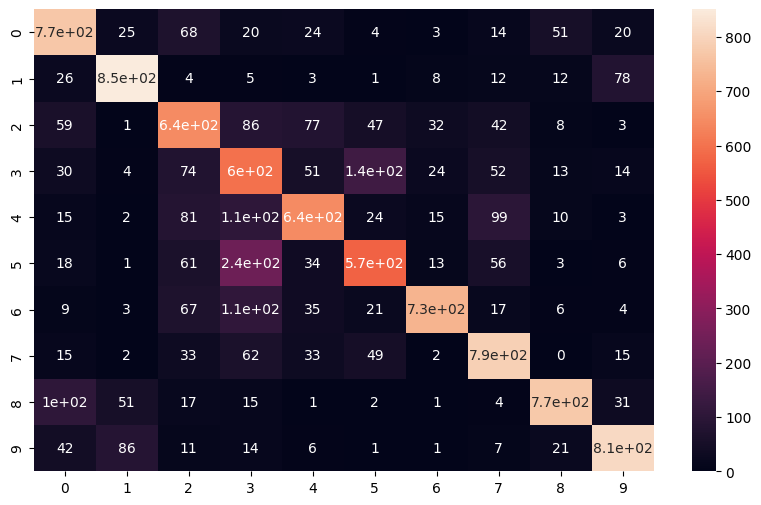

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions),annot=True)

In [32]:
my_image = x_test[16]

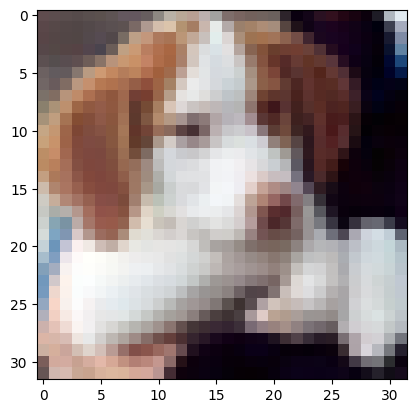

In [33]:
plt.imshow(my_image)

In [34]:
y_test[16]

array([5], dtype=uint8)

In [35]:
x_train.shape

(50000, 32, 32, 3)

In [36]:
model.predict(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 254ms/step


array([[7.4319931e-04, 1.7714319e-07, 7.4544093e-03, 9.6557617e-01,
        3.7935525e-04, 1.6316032e-02, 7.6937082e-05, 9.3722250e-03,
        8.1100872e-05, 5.0525659e-07]], dtype=float32)

In [37]:
def predict_classes(image):
    prediction = model.predict(image)
    return np.argmax(prediction, axis=1)

In [38]:
predict_classes(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 18ms/step


array([3])

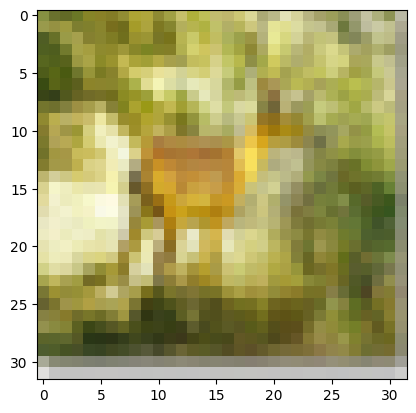

In [39]:
plt.imshow(x_test[500])

In [40]:
y_test[500]

array([4], dtype=uint8)

In [41]:
predict_classes(x_test[500].reshape(1,32,32,3))

1/1 [==============================] - 0s 18ms/step


array([4])

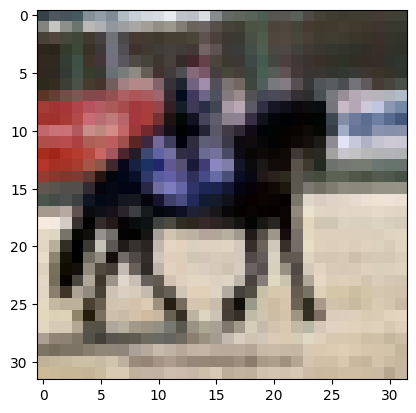

In [42]:
plt.imshow(x_test[5000])

In [43]:
y_test[5000]

array([7], dtype=uint8)

In [44]:
predict_classes(x_test[5000].reshape(1,32,32,3))

1/1 [==============================] - 0s 17ms/step


array([7])

In [45]:
model.save('cnn_acc_71.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [54]:
model = tf.keras.models.load_model('cnn_acc_71.h5')

In [52]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image as keras_image

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
image_path = '/content/drive/MyDrive/airplane.jpg'
img = keras_image.load_img(image_path, target_size=(32, 32))  # Resize to match CIFAR-10 images
img_array = keras_image.img_to_array(img)
img_array /= 255.0  # Normalize pixel values (same as CIFAR-10)

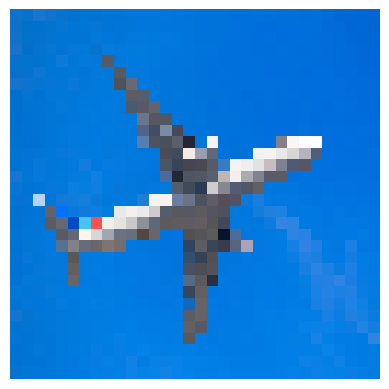

In [56]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [57]:
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
predictions = model.predict(img_array)


1/1 [==============================] - 0s 282ms/step


In [58]:
predicted_class = np.argmax(predictions)
print(f"Predicted class index: {predicted_class}")

Predicted class index: 0


In [59]:
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]
predicted_label = class_names[predicted_class]
print(f"Predicted label: {predicted_label}")

Predicted label: airplane
